In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
bb_df = pd.read_csv('baseball_data.csv')

In [8]:
bb_df.head(10)

,name,handedness,height,weight,avg,HR
0,Tom Brown,R,73,170,0.000,0
1,Denny Lemaster,R,73,182,0.130,4
2,Joe Nolan,L,71,175,0.263,27
3,Denny Doyle,L,69,175,0.250,16
4,Jose Cardenal,R,70,150,0.275,138
5,Mike Ryan,R,74,205,0.193,28
6,Fritz Peterson,B,72,185,0.159,2
7,Dick Bertell,R,72,200,0.250,10
8,Rod Kanehl,R,73,180,0.241,6
9,Ozzie Osborn,R,74,195,0.000,0


From this we can see that we have five columns of data and a sixth for an identifier. Handedness looks to be whether a person was left-handed, right-handed or ambidextrous. Height looks to be in inches. Weight looks to be in pounds. AVG, from the data dictionary, is the batting average for that person. HR is the amount of home runs for that person.

In [9]:
bb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 6 columns):
name          1157 non-null object
handedness    1157 non-null object
height        1157 non-null int64
weight        1157 non-null int64
avg           1157 non-null float64
HR            1157 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 54.3+ KB


We can see that our dataset contains 1157 values. 

In [12]:
bb_df.groupby('handedness')['name'].count()

handedness
B    104
L    316
R    737
Name: name, dtype: int64

From this, we can see that around 104 (8.99%) people are ambidextrous, 316 (27.31%) are left handed while the rest, 737 (63.70%), are right handed. 

In [22]:
bb_df.groupby('height').mean()

,weight,avg,HR
height,,,
65,148.000000,0.242000,41.000000
66,162.500000,0.254500,18.000000
67,159.250000,0.263250,100.000000
68,165.545455,0.229818,14.181818
69,165.463415,0.236122,26.463415
70,170.758929,0.230643,39.491071
71,175.965517,0.208186,47.213793
72,181.271552,0.212819,42.301724
73,184.360825,0.192660,50.974227


Whoa. Why does it look like those who are 67 inches (5' 7") hit the most home runs? Are they just physically more capable and therefore apt at baseball? Debatable. Let's dive deeper.

In [25]:
bb_df[bb_df['height']==67]

,name,handedness,height,weight,avg,HR
471,Vic Davalillo,L,67,150,0.279,36
638,Don Buford,B,67,160,0.264,93
672,Joe Morgan,L,67,160,0.271,268
1065,Ron Brand,R,67,167,0.239,3


It looks like one man, Joe Morgan, actually hit the most of these home runes and is carrying the other 67" men. Did Joe Morgan his the highest home run or is another factor making 67" men look superior by comparison. 

In [38]:
bb_df.sort_values(by = 'HR', ascending = False).head(10)

,name,handedness,height,weight,avg,HR
656,Reggie Jackson,L,72,195,0.262,563
995,Mike Schmidt,R,74,195,0.267,548
972,Willie Stargell,L,74,188,0.282,475
422,Carl Yastrzemski,L,71,175,0.285,452
45,Dave Kingman,R,78,210,0.236,442
16,Darrell Evans,L,74,200,0.248,414
295,Graig Nettles,L,72,180,0.248,390
761,Johnny Bench,R,73,197,0.267,389
1052,Jim Rice,R,74,200,0.298,382
203,Tony Perez,R,74,175,0.279,379


So Joe Morgan is not even in the top 10 home runs. Someone actually hit 563 home runs! Why did their value for their height decrease? 

In [40]:
bb_df.groupby('height')['name'].count()

height
65      1
66      2
67      4
68     11
69     41
70    112
71    145
72    232
73    194
74    180
75    121
76     66
77     30
78     11
79      3
80      4
Name: name, dtype: int64

In [44]:
height_bb = bb_df.groupby('height')

In [52]:
height_bb_count = pd.DataFrame()
height_bb_count['Count'] = height_bb['name'].count()
height_bb_count['Min'] = height_bb['HR'].min()
height_bb_count['Max'] = height_bb['HR'].max()
height_bb_count['AVG'] = height_bb['HR'].mean()
height_bb_count

,Count,Min,Max,AVG
height,,,,
65,1,41,41,41.000000
66,2,3,33,18.000000
67,4,3,268,100.000000
68,11,0,54,14.181818
69,41,0,155,26.463415
70,112,0,316,39.491071
71,145,0,452,47.213793
72,232,0,563,42.301724
73,194,0,389,50.974227


With this, we can see that a large portion of men in professional baseball are actually 72". They also have the largest range of home runs. This would be an interesting point to see for each height, how many home runs were hit.

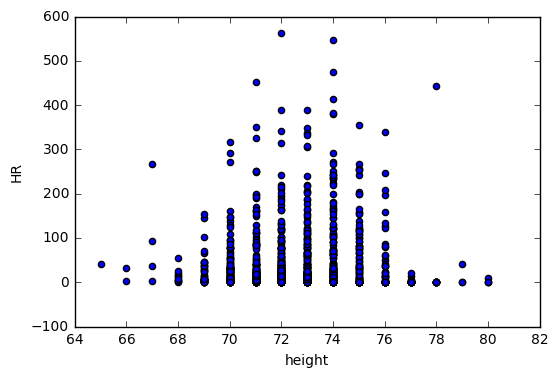

In [59]:
bb_df.plot(kind = 'scatter', x= 'height', y='HR')

Doing a quick plot, we can see that there are more heights between 72" and 75". It follows a bell distribution, as one would expect from a height of a person. 

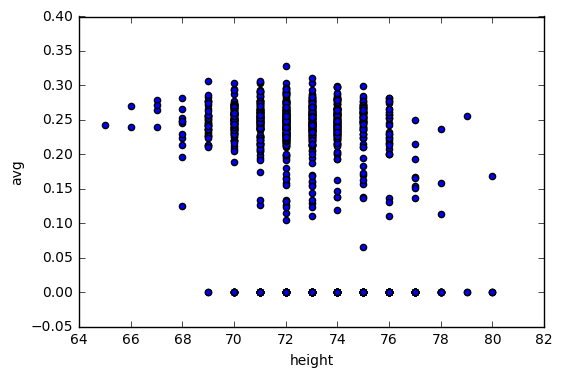

In [61]:
bb_df.plot(kind='Scatter', x='height', y='avg')

If we took the batting average of each person instead, we can see a more interesting graph. Most people hit between 15-30%. Some people hit 0%. Is there a specific reason why? 

The batting average isn't all encompassing as a tale for how well a person is performing in the season. For example, some of these hits may have been home runs while others of these are singles. 

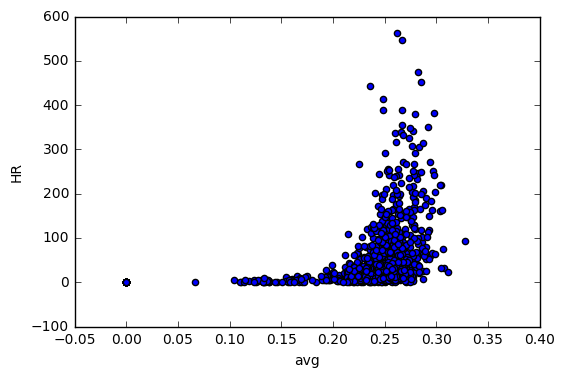

In [62]:
bb_df.plot(kind = 'Scatter', x='avg', y='HR')

As a persons batting average goes up, so does their amount of Home Runs. 

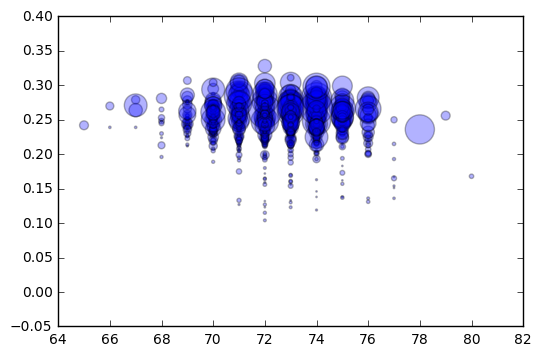

In [113]:

#data = {'a': np.arange(50),
#        'c': np.random.randint(0, 50, 50),
#        'd': np.random.randn(50)}
#data['b'] = data['a'] + 10 * np.random.randn(50)
#data['d'] = np.abs(data['d']) * 100
#
#plt.scatter('a', 'b', c='c', s='d', data=data)
#plt.xlabel('entry a')
#plt.ylabel('entry b')
#plt.show()



plt.scatter('height', 'avg',s=bb_df['HR'],data=bb_df, alpha = .3)
plt.show()

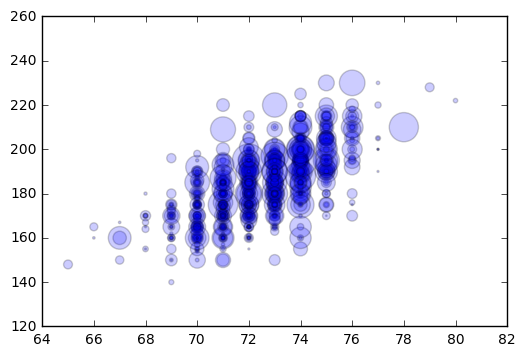

In [122]:
plt.scatter('height', 'weight', data=bb_df, s = 'HR', alpha = .2)
plt.show()

While our visuals are interesting, we have to be able to translate this into an easy to read format. Because of how our data clusters, they become jumbled and hard to read. 

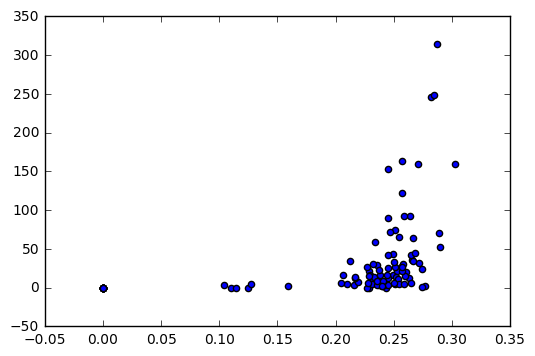

In [129]:
plt.scatter('avg', 'HR', data=bb_df[bb_df['handedness']=="B"])
plt.show()

In [137]:
bb_df[(bb_df['avg'] > 0)]

,name,handedness,height,weight,avg,HR
1,Denny Lemaster,R,73,182,0.130,4
2,Joe Nolan,L,71,175,0.263,27
3,Denny Doyle,L,69,175,0.250,16
4,Jose Cardenal,R,70,150,0.275,138
5,Mike Ryan,R,74,205,0.193,28
6,Fritz Peterson,B,72,185,0.159,2
7,Dick Bertell,R,72,200,0.250,10
8,Rod Kanehl,R,73,180,0.241,6
12,Juan Bonilla,R,69,170,0.256,7
13,Frank Tepedino,L,71,185,0.241,6
